In [8]:
%pylab inline
from numpy.random import normal as G
from pycheops.models import FactorModel, TransitModel 
from lmfit import report_fit


Populating the interactive namespace from numpy and matplotlib


In [9]:
T_0 = 0.0
P = 2.0
D = 0.08  # Transit Depth
W = 0.02  # Transit Width
b = 0.2   # Impact parameter
c = 10    # Flux outside transit
h_1 = 0.8
h_2 = 0.7

In [12]:
m = FactorModel()*TransitModel()
pars = m.make_params(T_0=T_0, D=D, W=W, b=b, h_1=h_1, h_2=h_2, c=c)
pars['P'].set(value=P, vary=False)
pars['f_c'].set(value=0, vary=False)
pars['f_s'].set(value=0, vary=False)
pars['h_2'].set(vary=False)

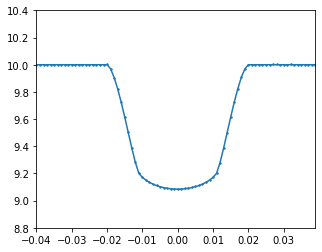

In [14]:
t = np.arange(-W*P,W*P, 0.001)
yerr = 150e-6

flux_true = m.eval(params=pars, t=t) 
flux = flux_true + pars['c']*G(0.0, yerr, size=len(t))

fig,ax=subplots(1,1,figsize=(5,4))
ax.plot(t, flux_true)
ax.scatter(t, flux,s=2)
ax.set_xlim(min(t),max(t))
ax.set_ylim(c*(1-1.5*D),c*(1+ 0.5*D));

In [15]:
result = m.fit(flux, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 80
    # variables        = 6
    chi-square         = 5032.89147
    reduced chi-square = 68.0120469
    Akaike info crit   = 343.337865
    Bayesian info crit = 357.630024
[[Variables]]
    d2fdt2:      0 (fixed)
    dfdt:        0 (fixed)
    dfdcosphi:   0 (fixed)
    dfdsinphi:   0 (fixed)
    dfdcos2phi:  0 (fixed)
    dfdsin2phi:  0 (fixed)
    d2fdy2:      0 (fixed)
    d2fdxdy:     0 (fixed)
    d2fdx2:      0 (fixed)
    dfdy:        0 (fixed)
    dfdx:        0 (fixed)
    c:           10.0000136 +/- 1.9237e-04 (0.00%) (init = 10)
    T_0:         2.4362e-06 +/- 3.0983e-06 (127.18%) (init = 0)
    P:           2 (fixed)
    D:           0.07991357 +/- 1.1393e-04 (0.14%) (init = 0.08)
    W:           0.01997381 +/- 9.1704e-06 (0.05%) (init = 0.02)
    b:           0.19155800 +/- 0.00536250 (2.80%) (init = 0.2)
    f_c:         0 (fixed)
    f_s:         0 (fixed)
    h_1:

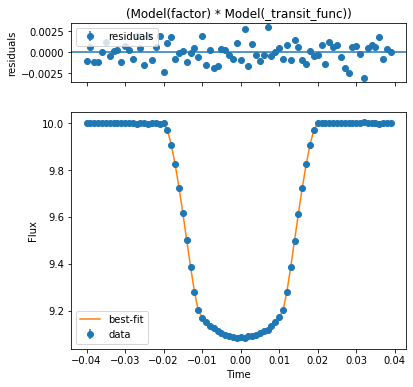

In [16]:
result.plot(xlabel='Time',ylabel='Flux');

&copy; Pierre Maxted, Keele University (2019)